In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/UNSW_2018_IoT_Botnet_Dataset_74_new (1).csv')

In [ ]:
df.head(10)

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,73000001,1528101778,e,udp,192.168.100.147,26077,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
1,73000002,1528101778,e,udp,192.168.100.147,26078,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
2,73000003,1528101778,e,udp,192.168.100.147,26079,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
3,73000004,1528101778,e,udp,192.168.100.147,26080,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
4,73000005,1528101778,e,udp,192.168.100.147,26081,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
5,73000006,1528101778,e,udp,192.168.100.147,26082,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
6,73000007,1528101778,e,udp,192.168.100.147,26083,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
7,73000008,1528101778,e,udp,192.168.100.147,26084,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
8,73000009,1528101778,e,udp,192.168.100.147,26085,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP
9,73000010,1528101778,e,udp,192.168.100.147,26086,192.168.100.7,80,4,240,...,4,0,240,0,0.363599,0.363599,0.0,1,DDoS,UDP


In [ ]:
df.value_counts(df.category)

category
DDoS      370424
Normal        19
dtype: int64

In [ ]:
df.value_counts(df.subcategory)

subcategory
UDP       370424
Normal        19
dtype: int64

In [ ]:
df.shape

(370443, 35)

In [ ]:
df.describe()

,pkSeqID,stime,pkts,bytes,ltime,seq,dur,mean,stddev,Unnamed: 16,...,Unnamed: 23,Unnamed: 24,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
count,3.704430e+05,3.704430e+05,370443.000000,3.704430e+05,3.704430e+05,370443.000000,370443.000000,370443.000000,370443.000000,0.0,...,0.0,0.0,370443.000000,370443.000000,3.704430e+05,3.704430e+05,370443.000000,370443.000000,370443.000000,370443.000000
mean,7.318522e+07,1.528102e+09,4.475002,7.542108e+02,1.528102e+09,153569.037107,11.464091,1.793580,0.701725,NaN,...,NaN,NaN,4.309861,0.165140,5.946857e+02,1.595251e+02,0.271051,0.254140,0.000873,0.999949
std,1.069378e+05,2.076443e+01,123.060604,1.160709e+05,2.633663e+01,74593.632930,6.432672,1.490278,0.798415,NaN,...,NaN,NaN,81.865574,53.050564,7.412185e+04,5.144249e+04,14.465237,10.946304,0.262812,0.007162
min,7.300000e+07,1.528102e+09,1.000000,6.000000e+01,1.528102e+09,1.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1.000000,0.000000,6.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.309261e+07,1.528102e+09,2.000000,1.200000e+02,1.528102e+09,92602.500000,4.842794,0.000000,0.000000,NaN,...,NaN,NaN,2.000000,0.000000,1.200000e+02,0.000000e+00,0.181432,0.181432,0.000000,1.000000
50%,7.318522e+07,1.528102e+09,4.000000,2.400000e+02,1.528102e+09,169554.000000,13.407727,1.645970,0.218172,NaN,...,NaN,NaN,4.000000,0.000000,2.400000e+02,0.000000e+00,0.207848,0.207848,0.000000,1.000000
75%,7.327783e+07,1.528102e+09,6.000000,3.600000e+02,1.528102e+09,215859.500000,16.854967,2.568633,1.311500,NaN,...,NaN,NaN,6.000000,0.000000,3.600000e+02,0.000000e+00,0.297826,0.297826,0.000000,1.000000
max,7.337044e+07,1.528102e+09,41145.000000,4.009849e+07,1.528102e+09,262166.000000,257.211456,4.940684,2.499093,NaN,...,NaN,NaN,20573.000000,20572.000000,2.069294e+07,2.047811e+07,5747.126465,4784.688965,79.976997,1.000000


In [ ]:
df.duplicated(keep = 'first').sum()

0

<Axes: >

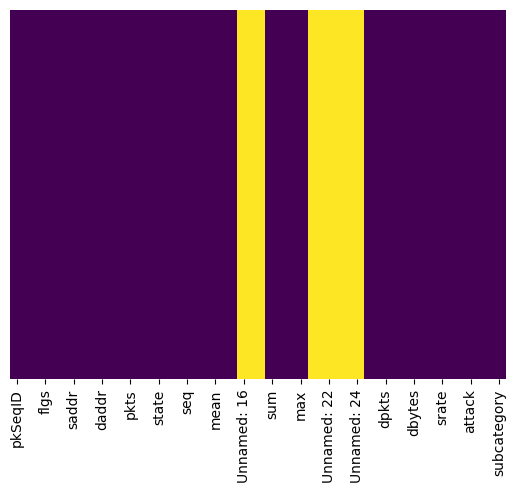

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [ ]:
missing_values_count = df.isnull().sum()


In [ ]:
missing_values_count[0:35]

pkSeqID             0
stime               0
flgs                0
proto               0
saddr               0
sport              12
daddr               0
dport              12
pkts                0
bytes               0
state               0
ltime               0
seq                 0
dur                 0
mean                0
stddev              0
Unnamed: 16    370443
Unnamed: 17    370443
sum                 0
min                 0
max                 0
Unnamed: 21    370443
Unnamed: 22    370443
Unnamed: 23    370443
Unnamed: 24    370443
spkts               0
dpkts               0
sbytes              0
dbytes              0
rate                0
srate               0
drate               0
attack              0
category            0
subcategory         0
dtype: int64

In [ ]:
#to find the percentage of missing values
number_of_cells = np.product(df.shape)
total_missing_values = missing_values_count.sum()

percent_missing = (total_missing_values/number_of_cells)* 100
print(percent_missing)

17.14304224941489


In [ ]:
ds=df.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','pkSeqID','ltime','stime'], axis =1)
db = ds.isnull().sum()
db[0:35]

flgs            0
proto           0
saddr           0
sport          12
daddr           0
dport          12
pkts            0
bytes           0
state           0
seq             0
dur             0
mean            0
stddev          0
sum             0
min             0
max             0
spkts           0
dpkts           0
sbytes          0
dbytes          0
rate            0
srate           0
drate           0
attack          0
category        0
subcategory     0
dtype: int64

In [ ]:
print(ds.dtypes)
print(ds.shape)

flgs            object
proto           object
saddr           object
sport           object
daddr           object
dport           object
pkts             int64
bytes            int64
state           object
seq              int64
dur            float64
mean           float64
stddev         float64
sum            float64
min            float64
max            float64
spkts            int64
dpkts            int64
sbytes           int64
dbytes           int64
rate           float64
srate          float64
drate          float64
attack           int64
category        object
subcategory     object
dtype: object
(370443, 26)


we in general were able to print the number of missing values in each colum. The below code prints the names of those specific coloumn having missing values

In [ ]:
nan_columns = ds.isna().any( axis =0)
the_nan_columns = ds.columns[nan_columns]
print(the_nan_columns)


Index(['sport', 'dport'], dtype='object')


now printing the rows in sport and sport columns having missing values

In [ ]:
nan_rows = ds[ds.isna().any(axis =1)]

print(nan_rows[the_nan_columns])

       sport dport
54755    NaN   NaN
108265   NaN   NaN
108267   NaN   NaN
137283   NaN   NaN
137668   NaN   NaN
137669   NaN   NaN
139866   NaN   NaN
169156   NaN   NaN
204097   NaN   NaN
343606   NaN   NaN
370430   NaN   NaN
370434   NaN   NaN


what are the unique values in proto?

In [ ]:
print(ds.proto.unique())
print("\n")
print(ds.flgs.unique())
print("\n")
#print(ds.pkts.unique())
print(ds.state.unique())
print("\n")
#print(ds.pkts.unique())
#print(ds.bytes.unique())
#print(ds.ltime.unique())
#print(ds.attack.unique())
print(ds.saddr.unique())
print("\n")
print(ds.daddr.unique())
print("\n")
print(ds.subcategory.unique())
print("\n")
print(ds.category.unique())
print("\n")
print(ds.sport.unique())
print("\n")
print(ds.dport.unique())

['udp' 'arp' 'icmp' 'tcp']


['e' 'eU' 'e *']


['INT' 'CON' 'URP']


['192.168.100.147' '192.168.100.148' '192.168.100.149' '192.168.100.150'
 '192.168.100.7' '192.168.100.46' '192.168.100.55' '192.168.100.6'
 '192.168.100.5' '192.168.100.3']


['192.168.100.7' '192.168.100.149' '192.168.100.147' '192.168.100.150'
 '192.168.100.5' '192.168.100.3' '192.168.100.148' '52.64.239.193'
 '192.168.100.255' '116.206.80.123' '192.168.100.1']


['UDP' 'Normal']


['DDoS' 'Normal']


[26077 26078 26079 ... '55843' '55844' '41307']


[80 '80' nan '0x5000' '0' '565' 8883.0 '138' '123' '8883']


now filling the missing sport and dport of the dataset with the value -1

In [ ]:
fd = ds.fillna(-1)


In [ ]:
fd.isnull().sum()

flgs           0
proto          0
saddr          0
sport          0
daddr          0
dport          0
pkts           0
bytes          0
state          0
seq            0
dur            0
mean           0
stddev         0
sum            0
min            0
max            0
spkts          0
dpkts          0
sbytes         0
dbytes         0
rate           0
srate          0
drate          0
attack         0
category       0
subcategory    0
dtype: int64

In [ ]:
fd.shape

(370443, 26)

# ONE HOT ENCODING

In [ ]:
dummies = pd.get_dummies(fd.iloc[:, [0,1,8,24,25]])


In [ ]:
print(dummies)

        flgs_e  flgs_e *  flgs_eU  proto_arp  proto_icmp  proto_tcp  \
0            1         0        0          0           0          0   
1            1         0        0          0           0          0   
2            1         0        0          0           0          0   
3            1         0        0          0           0          0   
4            1         0        0          0           0          0   
...        ...       ...      ...        ...         ...        ...   
370438       1         0        0          0           0          0   
370439       1         0        0          0           0          1   
370440       1         0        0          0           0          0   
370441       1         0        0          0           0          1   
370442       1         0        0          0           0          1   

        proto_udp  state_CON  state_INT  state_URP  category_DDoS  \
0               1          0          1          0              1   
1        

In [ ]:
dummies.head(10)

,flgs_e,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,state_INT,state_URP,category_DDoS,category_Normal,subcategory_Normal,subcategory_UDP
0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
1,1,0,0,0,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,0,0,1,0,1,0,1,0,0,1
4,1,0,0,0,0,0,1,0,1,0,1,0,0,1
5,1,0,0,0,0,0,1,0,1,0,1,0,0,1
6,1,0,0,0,0,0,1,0,1,0,1,0,0,1
7,1,0,0,0,0,0,1,0,1,0,1,0,0,1
8,1,0,0,0,0,0,1,0,1,0,1,0,0,1
9,1,0,0,0,0,0,1,0,1,0,1,0,0,1


In [ ]:
dummies.shape

(370443, 14)

In [ ]:
new_ds = fd.drop(['flgs','proto','state','category','subcategory'], axis =1)

In [ ]:
new_ds.head(10)


,saddr,sport,daddr,dport,pkts,bytes,seq,dur,mean,stddev,...,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
0,192.168.100.147,26077,192.168.100.7,80,4,240,153896,8.250854,2.655664,0.291301,...,2.364365,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
1,192.168.100.147,26078,192.168.100.7,80,4,240,153897,8.250855,2.655665,0.291301,...,2.364366,2.946965,4,0,240,0,0.363599,0.363599,0.0,1
2,192.168.100.147,26079,192.168.100.7,80,4,240,153898,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
3,192.168.100.147,26080,192.168.100.7,80,4,240,153899,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
4,192.168.100.147,26081,192.168.100.7,80,4,240,153900,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
5,192.168.100.147,26082,192.168.100.7,80,4,240,153901,8.250854,2.655664,0.291300,...,2.364366,2.946963,4,0,240,0,0.363599,0.363599,0.0,1
6,192.168.100.147,26083,192.168.100.7,80,4,240,153902,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
7,192.168.100.147,26084,192.168.100.7,80,4,240,153903,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
8,192.168.100.147,26085,192.168.100.7,80,4,240,153904,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1
9,192.168.100.147,26086,192.168.100.7,80,4,240,153905,8.250854,2.655665,0.291300,...,2.364366,2.946964,4,0,240,0,0.363599,0.363599,0.0,1


In [ ]:
new_ds.shape

(370443, 21)

In [ ]:
new_ds = new_ds.join(dummies)

In [ ]:
new_ds.head(10)

,saddr,sport,daddr,dport,pkts,bytes,seq,dur,mean,stddev,...,proto_icmp,proto_tcp,proto_udp,state_CON,state_INT,state_URP,category_DDoS,category_Normal,subcategory_Normal,subcategory_UDP
0,192.168.100.147,26077,192.168.100.7,80,4,240,153896,8.250854,2.655664,0.291301,...,0,0,1,0,1,0,1,0,0,1
1,192.168.100.147,26078,192.168.100.7,80,4,240,153897,8.250855,2.655665,0.291301,...,0,0,1,0,1,0,1,0,0,1
2,192.168.100.147,26079,192.168.100.7,80,4,240,153898,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
3,192.168.100.147,26080,192.168.100.7,80,4,240,153899,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
4,192.168.100.147,26081,192.168.100.7,80,4,240,153900,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
5,192.168.100.147,26082,192.168.100.7,80,4,240,153901,8.250854,2.655664,0.291300,...,0,0,1,0,1,0,1,0,0,1
6,192.168.100.147,26083,192.168.100.7,80,4,240,153902,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
7,192.168.100.147,26084,192.168.100.7,80,4,240,153903,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
8,192.168.100.147,26085,192.168.100.7,80,4,240,153904,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
9,192.168.100.147,26086,192.168.100.7,80,4,240,153905,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
new_ds.shape

(370443, 35)

so finally the dataset to be used here on is the new_ds.
new_ds => the data set after one hot encoding

# **---------------ONE HOT FINISH----------**

# checking data types and converting all obejct to int

In [ ]:
new_ds.dtypes

saddr                  object
sport                  object
daddr                  object
dport                  object
pkts                    int64
bytes                   int64
seq                     int64
dur                   float64
mean                  float64
stddev                float64
sum                   float64
min                   float64
max                   float64
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
srate                 float64
drate                 float64
attack                  int64
flgs_e                  uint8
flgs_e *                uint8
flgs_eU                 uint8
proto_arp               uint8
proto_icmp              uint8
proto_tcp               uint8
proto_udp               uint8
state_CON               uint8
state_INT               uint8
state_URP               uint8
category_DDoS           uint8
category_Normal         uint8
subcategor

filling out the 0x0303 values in sport and 0x5000 in dport with -1

In [ ]:
fd2 = new_ds.loc[new_ds['sport'].str.contains('0x',na=False)]

In [ ]:
fd2

,saddr,sport,daddr,dport,pkts,bytes,seq,dur,mean,stddev,...,proto_icmp,proto_tcp,proto_udp,state_CON,state_INT,state_URP,category_DDoS,category_Normal,subcategory_Normal,subcategory_UDP
55327,192.168.100.7,0x0303,192.168.100.149,0x5000,8,560,209223,4.088398,4.088398,0.000000,...,1,0,0,0,0,1,1,0,0,1
94909,192.168.100.7,0x0303,192.168.100.147,0x5000,5,350,248805,4.043360,4.043360,0.000000,...,1,0,0,0,0,1,1,0,0,1
108266,192.168.100.7,0x0303,192.168.100.150,0x5000,7,490,262162,4.238360,4.238360,0.000000,...,1,0,0,0,0,1,1,0,0,1
203412,192.168.100.7,0x0303,192.168.100.147,0x5000,10,700,95145,7.901724,3.441953,1.427657,...,1,0,0,0,0,1,1,0,0,1
285235,192.168.100.7,0x0303,192.168.100.148,0x5000,11,770,176968,7.831230,3.410010,1.394074,...,1,0,0,0,0,1,1,0,0,1
369866,192.168.100.7,0x0303,192.168.100.149,0x5000,14,980,261599,15.282904,2.261610,1.952883,...,1,0,0,0,0,1,1,0,0,1
370431,192.168.100.7,0x0303,192.168.100.150,0x5000,2,140,262164,0.000216,0.000216,0.000000,...,1,0,0,0,0,1,1,0,0,1


In [ ]:
indices = [55327,94909,108266,203412,285235,369866,370431]
new_ds.loc[indices,'sport'] = -1


In [ ]:
new_ds.loc[indices,'dport'] = -1

In [ ]:
new_ds.loc[indices,['sport','dport']]

,sport,dport
55327,-1,-1
94909,-1,-1
108266,-1,-1
203412,-1,-1
285235,-1,-1
369866,-1,-1
370431,-1,-1


Now changing the datatypes of sport and dport

In [ ]:
new_ds[['sport','dport']] = new_ds[['sport','dport']].astype(int)

In [ ]:
new_ds.dtypes

saddr                  object
sport                   int64
daddr                  object
dport                   int64
pkts                    int64
bytes                   int64
seq                     int64
dur                   float64
mean                  float64
stddev                float64
sum                   float64
min                   float64
max                   float64
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
srate                 float64
drate                 float64
attack                  int64
flgs_e                  uint8
flgs_e *                uint8
flgs_eU                 uint8
proto_arp               uint8
proto_icmp              uint8
proto_tcp               uint8
proto_udp               uint8
state_CON               uint8
state_INT               uint8
state_URP               uint8
category_DDoS           uint8
category_Normal         uint8
subcategor

# Now working for changing the ip addresses to int

In [ ]:
print(new_ds.saddr.unique())
print("\n")
print(new_ds.daddr.unique())
print("\n")

['192.168.100.147' '192.168.100.148' '192.168.100.149' '192.168.100.150'
 '192.168.100.7' '192.168.100.46' '192.168.100.55' '192.168.100.6'
 '192.168.100.5' '192.168.100.3']


['192.168.100.7' '192.168.100.149' '192.168.100.147' '192.168.100.150'
 '192.168.100.5' '192.168.100.3' '192.168.100.148' '52.64.239.193'
 '192.168.100.255' '116.206.80.123' '192.168.100.1']




In [ ]:

label_encoder = preprocessing.LabelEncoder()

new_ds['saddr']= label_encoder.fit_transform(new_ds['saddr'])
new_ds['daddr']= label_encoder.fit_transform(new_ds['daddr'])

print ( new_ds['saddr'].unique() )
print ( new_ds['daddr'].unique() )

[0 1 2 3 9 5 7 8 6 4]
[ 9  4  2  5  8  7  3 10  6  0  1]


In [ ]:
# label encoding done
new_ds.head(30)

,saddr,sport,daddr,dport,pkts,bytes,seq,dur,mean,stddev,...,proto_icmp,proto_tcp,proto_udp,state_CON,state_INT,state_URP,category_DDoS,category_Normal,subcategory_Normal,subcategory_UDP
0,0,26077,9,80,4,240,153896,8.250854,2.655664,0.291301,...,0,0,1,0,1,0,1,0,0,1
1,0,26078,9,80,4,240,153897,8.250855,2.655665,0.291301,...,0,0,1,0,1,0,1,0,0,1
2,0,26079,9,80,4,240,153898,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
3,0,26080,9,80,4,240,153899,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
4,0,26081,9,80,4,240,153900,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
5,0,26082,9,80,4,240,153901,8.250854,2.655664,0.291300,...,0,0,1,0,1,0,1,0,0,1
6,0,26083,9,80,4,240,153902,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
7,0,26084,9,80,4,240,153903,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
8,0,26085,9,80,4,240,153904,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1
9,0,26086,9,80,4,240,153905,8.250854,2.655665,0.291300,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
new_ds.dtypes
#all datatypes converted to int,float

saddr                   int64
sport                   int64
daddr                   int64
dport                   int64
pkts                    int64
bytes                   int64
seq                     int64
dur                   float64
mean                  float64
stddev                float64
sum                   float64
min                   float64
max                   float64
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
srate                 float64
drate                 float64
attack                  int64
flgs_e                  uint8
flgs_e *                uint8
flgs_eU                 uint8
proto_arp               uint8
proto_icmp              uint8
proto_tcp               uint8
proto_udp               uint8
state_CON               uint8
state_INT               uint8
state_URP               uint8
category_DDoS           uint8
category_Normal         uint8
subcategor

In [ ]:
# removing one column from the one hot encoded ones


In [ ]:
new_ds.shape

(370443, 35)

# CORRELATION

In [ ]:
# perform the below codes by removeing the attack column from new_ds and use the remaining part of the new_ds dataset in the below code
# the attack column is not removed. remove it and use

In [ ]:
c_ds= new_ds

In [ ]:
c_ds.shape

(370443, 35)

In [ ]:
c_ds = c_ds.drop(['attack'], axis = 1)


In [ ]:
c_ds.shape

(370443, 34)

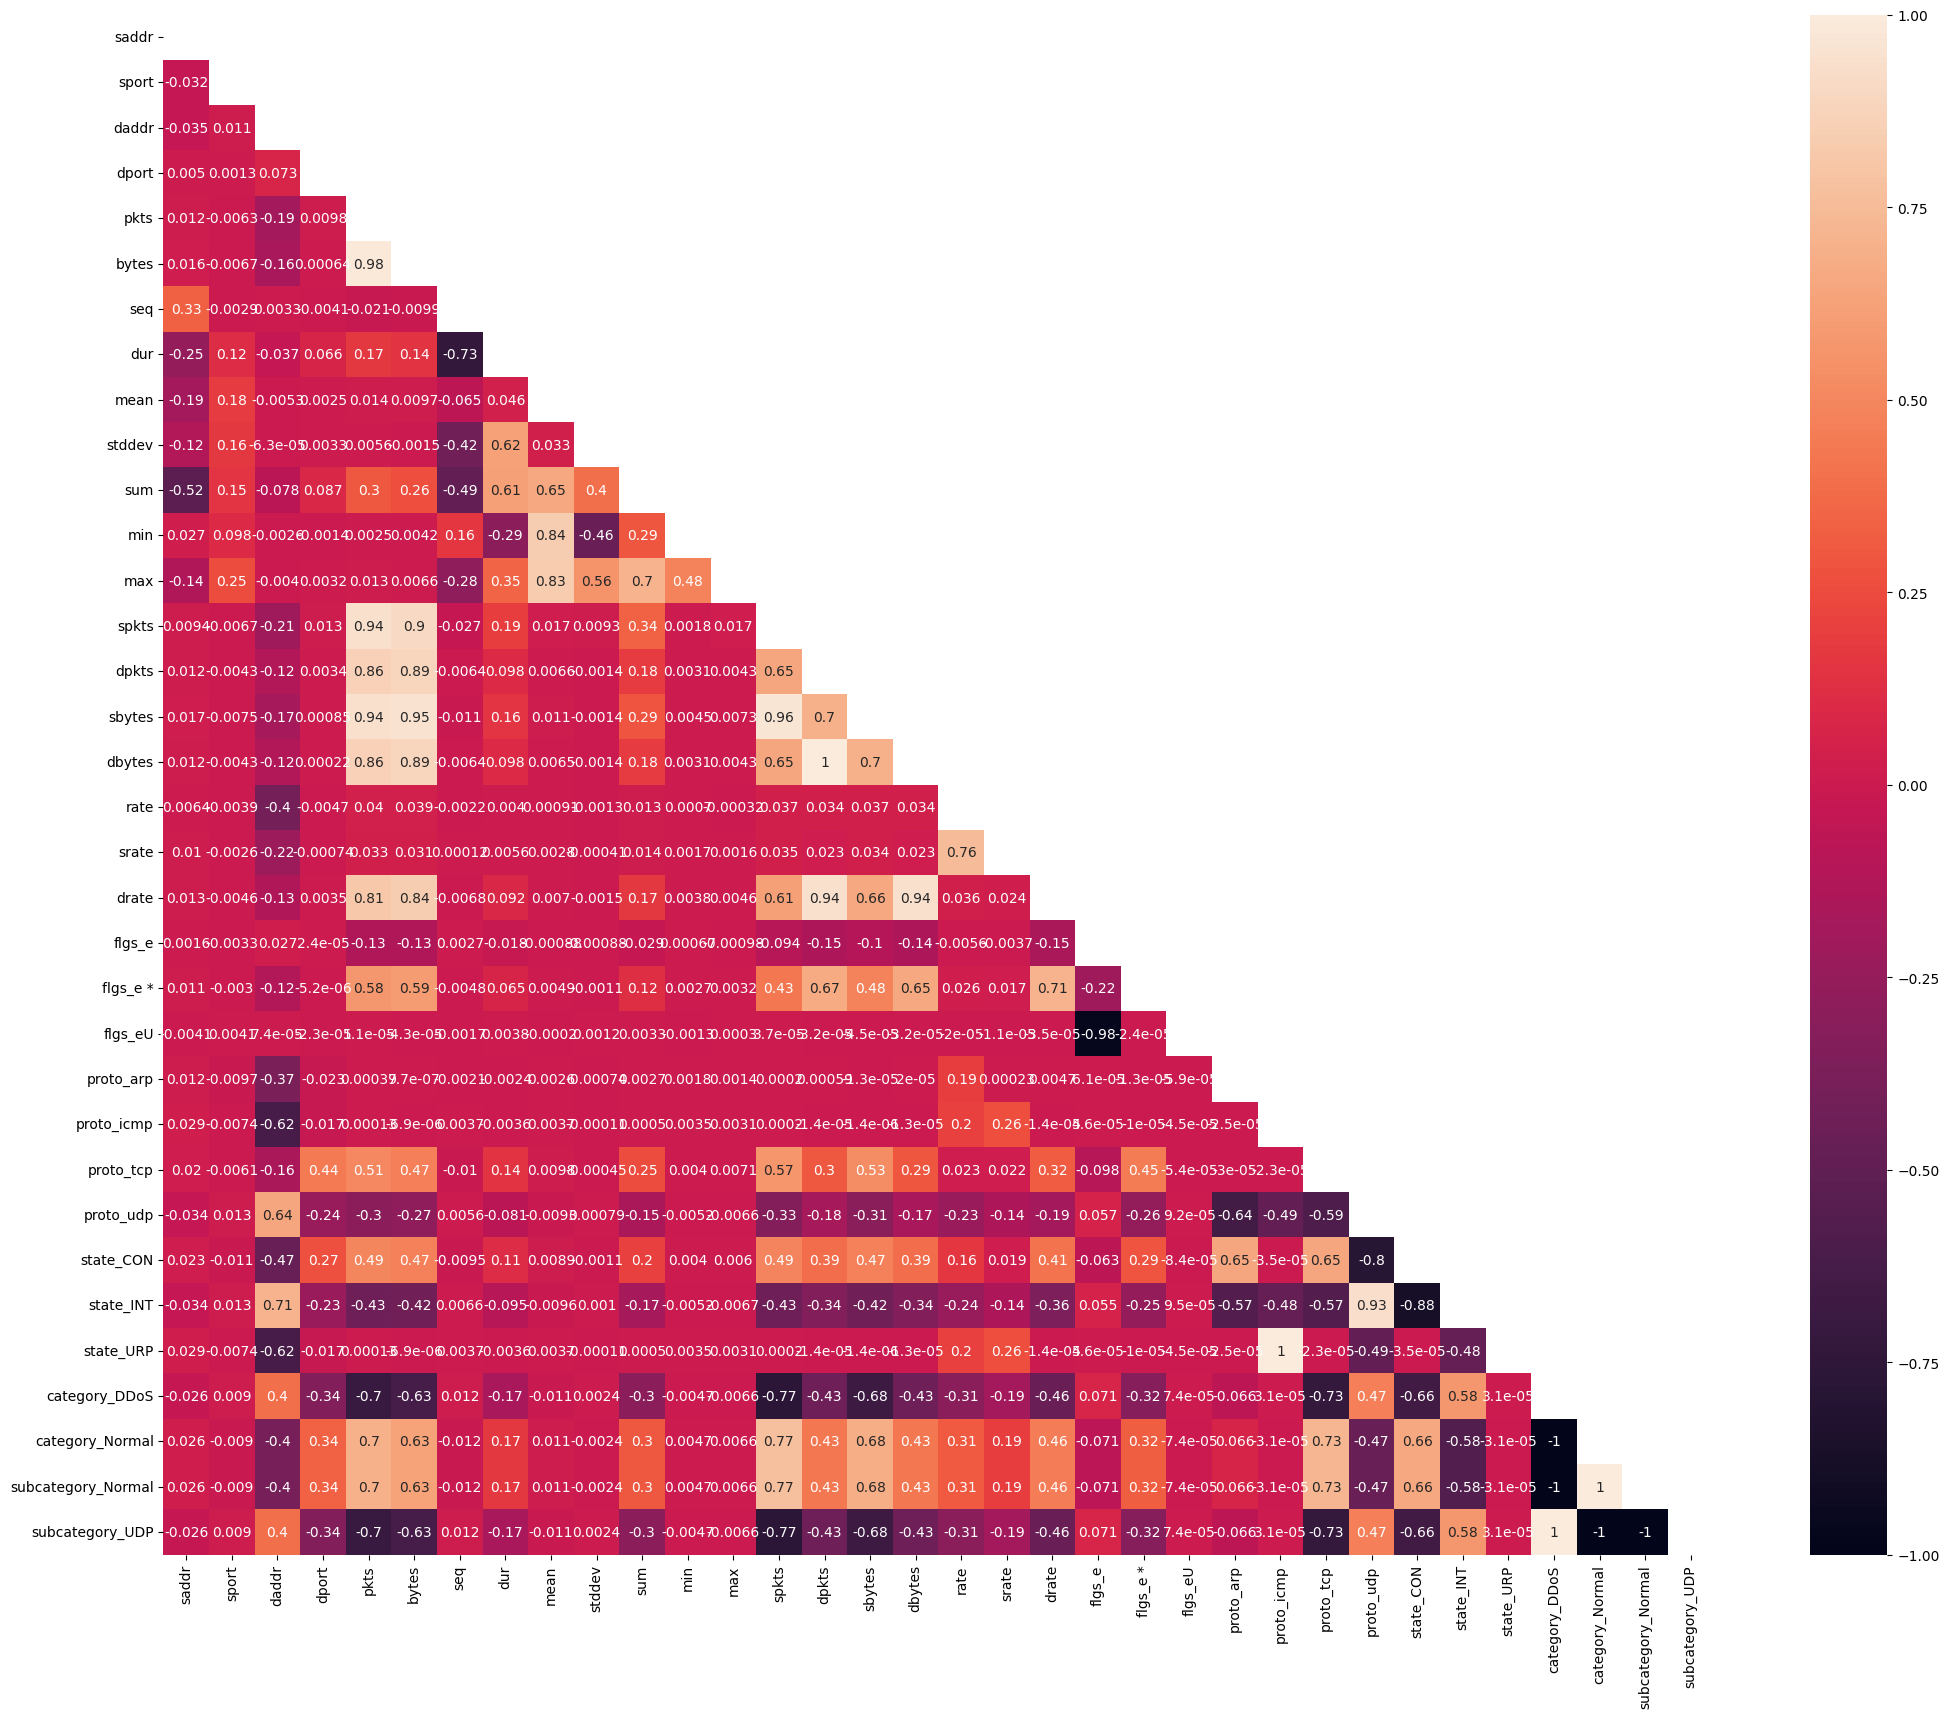

In [ ]:
corr=c_ds.corr()
plt.figure(figsize=(25,20))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [ ]:
c_ds.corr().style.background_gradient(cmap="coolwarm")

,saddr,sport,daddr,dport,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,flgs_e,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,state_INT,state_URP,category_DDoS,category_Normal,subcategory_Normal,subcategory_UDP
saddr,1.000000,-0.032211,-0.034708,0.004971,0.011528,0.016093,0.328193,-0.251431,-0.190010,-0.123296,-0.523078,0.027473,-0.136504,0.009435,0.012182,0.016825,0.012068,0.006432,0.010287,0.013062,0.001610,0.011177,-0.004149,0.012107,0.028685,0.020346,-0.033830,0.023421,-0.034240,0.028685,-0.025685,0.025685,0.025685,-0.025685
sport,-0.032211,1.000000,0.010508,0.001294,-0.006316,-0.006710,-0.002913,0.116314,0.181100,0.164688,0.150341,0.097908,0.254341,-0.006691,-0.004325,-0.007502,-0.004332,-0.003880,-0.002619,-0.004621,-0.003346,-0.002954,0.004089,-0.009674,-0.007388,-0.006102,0.013436,-0.010899,0.013101,-0.007388,0.009026,-0.009026,-0.009026,0.009026
daddr,-0.034708,0.010508,1.000000,0.072503,-0.192594,-0.164944,0.003310,-0.037396,-0.005268,-0.000063,-0.078354,-0.002564,-0.003974,-0.210101,-0.122537,-0.174209,-0.121155,-0.401883,-0.221558,-0.133200,0.026586,-0.122156,0.000074,-0.374041,-0.620363,-0.163877,0.641644,-0.467261,0.705939,-0.620363,0.396339,-0.396339,-0.396339,0.396339
dport,0.004971,0.001294,0.072503,1.000000,0.009777,0.000645,-0.004084,0.065751,0.002508,0.003283,0.086747,-0.001428,0.003230,0.012501,0.003389,0.000854,0.000224,-0.004723,-0.000743,0.003531,0.000024,-0.000005,-0.000023,-0.022507,-0.017190,0.442271,-0.236793,0.271602,-0.230812,-0.017190,-0.339062,0.339062,0.339062,-0.339062
pkts,0.011528,-0.006316,-0.192594,0.009777,1.000000,0.984236,-0.020662,0.170418,0.013994,0.005583,0.302301,0.002542,0.012976,0.944546,0.862098,0.943163,0.861781,0.039706,0.032963,0.813642,-0.125566,0.575339,0.000011,0.000387,0.000130,0.507761,-0.298488,0.494124,-0.434837,0.000130,-0.698484,0.698484,0.698484,-0.698484
bytes,0.016093,-0.006710,-0.164944,0.000645,0.984236,1.000000,-0.009915,0.142505,0.009709,-0.001501,0.262651,0.004233,0.006574,0.902742,0.890040,0.948473,0.889698,0.039077,0.031478,0.840020,-0.129703,0.594535,-0.000043,0.000001,-0.000007,0.465943,-0.273615,0.472094,-0.415388,-0.000007,-0.628720,0.628720,0.628720,-0.628720
seq,0.328193,-0.002913,0.003310,-0.004084,-0.020662,-0.009915,1.000000,-0.727459,-0.064892,-0.416492,-0.486244,0.160494,-0.276954,-0.026918,-0.006392,-0.011103,-0.006374,-0.002196,0.000119,-0.006813,0.002698,-0.004778,-0.001696,-0.002138,0.003672,-0.010282,0.005609,-0.009528,0.006639,0.003672,0.011788,-0.011788,-0.011788,0.011788
dur,-0.251431,0.116314,-0.037396,0.065751,0.170418,0.142505,-0.727459,1.000000,0.045952,0.618160,0.611214,-0.294000,0.351412,0.192772,0.097837,0.155441,0.097567,0.003951,0.005629,0.091735,-0.017800,0.064675,0.003778,-0.002414,-0.003559,0.143781,-0.081132,0.109613,-0.094757,-0.003559,-0.165246,0.165246,0.165246,-0.165246
mean,-0.190010,0.181100,-0.005268,0.002508,0.013994,0.009709,-0.064892,0.045952,1.000000,0.032703,0.653648,0.839713,0.834113,0.016789,0.006552,0.010666,0.006539,0.000905,0.002791,0.006963,-0.000879,0.004901,-0.000195,0.002606,0.003721,0.009829,-0.009277,0.008901,-0.009600,0.003721,-0.010537,0.010537,0.010537,-0.010537
stddev,-0.123296,0.164688,-0.000063,0.003283,0.005583,-0.001501,-0.416492,0.618160,0.032703,1.000000,0.397025,-0.460708,0.555227,0.009285,-0.001377,-0.001385,-0.001390,-0.001316,-0.000415,-0.001536,-0.000881,-0.001127,0.001155,-0.000743,-0.000107,-0.000445,0.000792,-0.001135,0.001049,-0.000107,0.002374,-0.002374,-0.002374,0.002374


In [ ]:
#based on the above two decide what columns to drop and drop those columns.
# after droping those columns make sure to make the respective changes in the codes below till the end of the file

**The following are the column pairs with higher correlation than the threshold: ( Threshold : 0.9)**
* bytes -> pkts
* spkts -> pkts
* bytes -> spkts
* sbytes -> pkts
* bytes -> sbytes
* sbytes -> spkts
* dbytes -> spkts
* dbytes -> dpkts
* drate -> dpkts
* drate -> dbytes
* state_int -> proto_udp
* state_udp -> proto_icmp
* category_DDos -> category_normal
* category_DDos -> subcategory_normal
* subcategory_UDP -> Category_DDos
* subcategory_UDP -> Category_normal
* subcategory_UDP -> subcategory_normal
* flg_eU -> flag_e


**We remove the following columns**
* pkts
* sbytes
* dpkts
* dbytes
* state_int
* stae_urp
* flg_e
* subcategory_udp
* subcategory_normal

In [ ]:
c_ds = c_ds.drop(['pkts', 'sbytes', 'dbytes', 'dpkts', 'state_INT', 'state_URP', 'flgs_e', 'subcategory_UDP', 'subcategory_Normal'], axis = 1)

In [ ]:
c_ds.shape

(370443, 25)

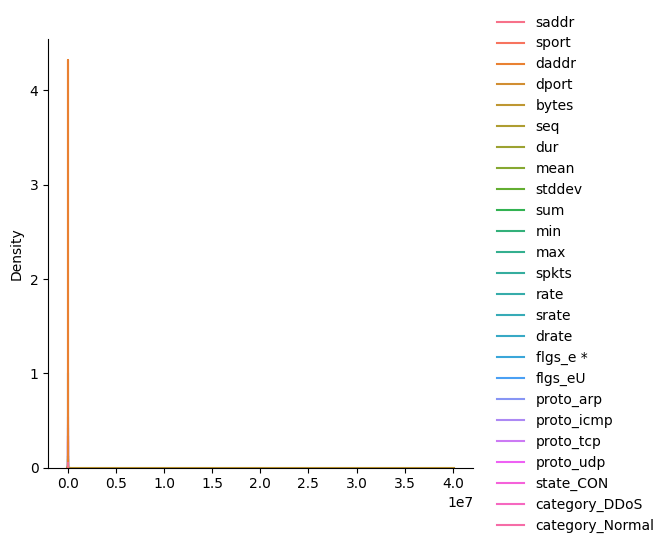

In [ ]:
sns.displot(c_ds, kind="kde", bw_adjust=1)

# **SCALING**

**Normalization**

In [ ]:
    # removing all the one hot encoded columns and target coloumn from the copied dataset before normalizing
#temp = new_ds
#temp = temp.drop(['flgs_e', 'flgs_e *', 'flgs_eU', 'proto_arp', 'proto_icmp', 'proto_tcp', 'proto_udp','state_CON', 'state_INT', 'state_URP', 'category_DDoS','category_Normal','subcategory_Normal','subcategory_UDP','attack'], axis =1)

In [ ]:
# removing all the one hot encoded columns and target coloumn from the copied dataset before normalizing
temp = c_ds
temp = temp.drop(['flgs_e *', 'flgs_eU', 'proto_arp', 'proto_icmp', 'proto_tcp', 'proto_udp','state_CON','category_DDoS','category_Normal'], axis =1)

In [ ]:
#we observe 9 columns have been removed from temp
temp.shape

(370443, 16)

In [ ]:
#d = preprocessing.normalize(temp)
#names = temp.columns
#nn_ds = pd.DataFrame(d, columns=names)


In [ ]:
names = temp.columns

scaler = preprocessing.MinMaxScaler()
nn_ds = scaler.fit_transform(temp)
nn_ds = pd.DataFrame(nn_ds, columns=names)

In [ ]:
nn_ds.head()

,saddr,sport,daddr,dport,bytes,seq,dur,mean,stddev,sum,min,max,spkts,rate,srate,drate
0,0.0,0.397919,0.9,0.009118,0.000004,0.587016,0.032078,0.537509,0.116563,0.0207,0.480542,0.589393,0.000146,0.000063,0.000076,0.0
1,0.0,0.397934,0.9,0.009118,0.000004,0.587020,0.032078,0.537510,0.116563,0.0207,0.480542,0.589393,0.000146,0.000063,0.000076,0.0
2,0.0,0.397949,0.9,0.009118,0.000004,0.587023,0.032078,0.537510,0.116562,0.0207,0.480542,0.589393,0.000146,0.000063,0.000076,0.0
3,0.0,0.397964,0.9,0.009118,0.000004,0.587027,0.032078,0.537510,0.116562,0.0207,0.480542,0.589393,0.000146,0.000063,0.000076,0.0
4,0.0,0.397980,0.9,0.009118,0.000004,0.587031,0.032078,0.537510,0.116562,0.0207,0.480542,0.589393,0.000146,0.000063,0.000076,0.0


In [ ]:
nn_ds.shape

(370443, 16)

In [ ]:
# now all the remaining 20 columns have been normalized, and we have 14 one hoted columns within values 0 to 1, so it time to include those 14 columns
# nn_ds has the 20 normalized columns so add to it.
cn = [ 'flgs_e *', 'flgs_eU', 'proto_arp', 'proto_icmp', 'proto_tcp', 'proto_udp','state_CON', 'category_DDoS','category_Normal']
nn_ds[cn] = c_ds[cn]



In [ ]:
nn_ds.shape

(370443, 25)

In [ ]:
nn_ds.head()

,saddr,sport,daddr,dport,bytes,seq,dur,mean,stddev,sum,...,drate,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,category_DDoS,category_Normal
0,0.0,0.397919,0.9,0.009118,0.000004,0.587016,0.032078,0.537509,0.116563,0.0207,...,0.0,0,0,0,0,0,1,0,1,0
1,0.0,0.397934,0.9,0.009118,0.000004,0.587020,0.032078,0.537510,0.116563,0.0207,...,0.0,0,0,0,0,0,1,0,1,0
2,0.0,0.397949,0.9,0.009118,0.000004,0.587023,0.032078,0.537510,0.116562,0.0207,...,0.0,0,0,0,0,0,1,0,1,0
3,0.0,0.397964,0.9,0.009118,0.000004,0.587027,0.032078,0.537510,0.116562,0.0207,...,0.0,0,0,0,0,0,1,0,1,0
4,0.0,0.397980,0.9,0.009118,0.000004,0.587031,0.032078,0.537510,0.116562,0.0207,...,0.0,0,0,0,0,0,1,0,1,0


the 'attack' hasn't been added to the dataset yet

**Standardization**

we get a normal distrubution curve only when our dataset is standardized , beacuse in standardization we are bring values close to mean. Whereas in the case of normalization the values are just reduced in scale and hence the shape of the curve doesn't change.

In [ ]:
from sklearn.preprocessing import StandardScaler
#nn_ds => new normalized
#ns_ds => new standardized

In [ ]:
names = nn_ds.columns
ns_ds = StandardScaler().fit_transform(nn_ds)
ns_ds = pd.DataFrame(data=ns_ds, columns=names)

In [ ]:
ns_ds.head()

,saddr,sport,daddr,dport,bytes,seq,dur,mean,stddev,sum,...,drate,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,category_DDoS,category_Normal
0,-1.450116,-0.317407,0.007097,-0.002236,-0.00443,0.004383,-0.499519,0.578473,-0.514049,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
1,-1.450116,-0.317354,0.007097,-0.002236,-0.00443,0.004397,-0.499519,0.578473,-0.514049,0.286453,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
2,-1.450116,-0.317301,0.007097,-0.002236,-0.00443,0.004410,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
3,-1.450116,-0.317248,0.007097,-0.002236,-0.00443,0.004423,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
4,-1.450116,-0.317195,0.007097,-0.002236,-0.00443,0.004437,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162


In [ ]:
ns_ds.tail()

,saddr,sport,daddr,dport,bytes,seq,dur,mean,stddev,sum,...,drate,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,category_DDoS,category_Normal
370438,3.021518,-1.695343,-26.282822,-0.002236,81.850262,-2.058691,17.464927,2.111273,-0.562208,33.185399,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,-139.628077,139.628077
370439,3.915845,-1.699583,-52.572740,-3.905687,36.382293,-2.058678,17.464926,2.104178,-0.562349,33.111814,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,192.466361,-113.017240,124.234154,-139.628077,139.628077
370440,6.598825,-1.680237,-52.572740,23.662435,2.745100,-2.058664,17.463001,2.103387,-0.549665,33.103616,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,-139.628077,139.628077
370441,5.704498,-1.695343,-52.572740,-0.002236,8.516167,-2.058651,17.459273,2.094693,-0.530798,33.013447,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,192.466361,-113.017240,124.234154,-139.628077,139.628077
370442,2.127191,0.489838,26.297015,429.523752,0.346011,-2.058624,16.190977,0.616578,1.701227,16.929020,...,1.543497,-0.002324,-0.010392,-0.005692,-0.004347,192.466361,-113.017240,124.234154,-139.628077,139.628077


In [ ]:
# dont do the below code : wrong
#now adding attack column from new_ds to new standardized dataset , i,e. ns_ds
#ns_ds['attack'] = new_ds['attack']

In [ ]:
ns_ds.shape

(370443, 25)

In [ ]:
ns_ds.dtypes

saddr              float64
sport              float64
daddr              float64
dport              float64
bytes              float64
seq                float64
dur                float64
mean               float64
stddev             float64
sum                float64
min                float64
max                float64
spkts              float64
rate               float64
srate              float64
drate              float64
flgs_e *           float64
flgs_eU            float64
proto_arp          float64
proto_icmp         float64
proto_tcp          float64
proto_udp          float64
state_CON          float64
category_DDoS      float64
category_Normal    float64
dtype: object

In [ ]:
# have to draw the bell shaped graph for seeing visually the standardization

we are not including the attack column yet becuase the dataset with 34 columns has to be send to pca, svd, and cur so that we get collection of new features and then to those new datasets we add attack individually.

# Split - Majority and Minority

In [ ]:
ns_ds['attack'] = new_ds['attack']

In [ ]:
major = ns_ds.loc[ns_ds['attack']==1]

In [ ]:
minor = ns_ds.loc[ns_ds['attack']==0]

In [ ]:
ns_ds = ns_ds.drop('attack',axis=1)

In [ ]:
minor.shape

(19, 26)

In [ ]:
major['attack'].unique()

array([1])

In [ ]:
major = major.drop(['attack'],axis=1)

In [ ]:
major

,saddr,sport,daddr,dport,bytes,seq,dur,mean,stddev,sum,...,drate,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,category_DDoS,category_Normal
0,-1.450116,-0.317407,0.007097,-0.002236,-0.004430,0.004383,-0.499519,0.578473,-0.514049,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
1,-1.450116,-0.317354,0.007097,-0.002236,-0.004430,0.004397,-0.499519,0.578473,-0.514049,0.286453,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
2,-1.450116,-0.317301,0.007097,-0.002236,-0.004430,0.004410,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
3,-1.450116,-0.317248,0.007097,-0.002236,-0.004430,0.004423,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
4,-1.450116,-0.317195,0.007097,-0.002236,-0.004430,0.004437,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370427,0.338537,1.341607,0.007097,-0.002236,-0.005464,1.455769,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
370428,0.338537,1.341660,0.007097,-0.002236,-0.005464,1.455783,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
370429,0.338537,1.341713,0.007097,-0.002236,-0.005464,1.455796,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
370430,1.232864,-1.699636,0.007097,-3.954480,-0.003913,1.455809,-1.297890,0.886828,-0.878898,-0.324867,...,-0.003321,-0.002324,-0.010392,175.696471,-0.004347,-0.005196,-113.017240,124.234154,0.007162,-0.007162


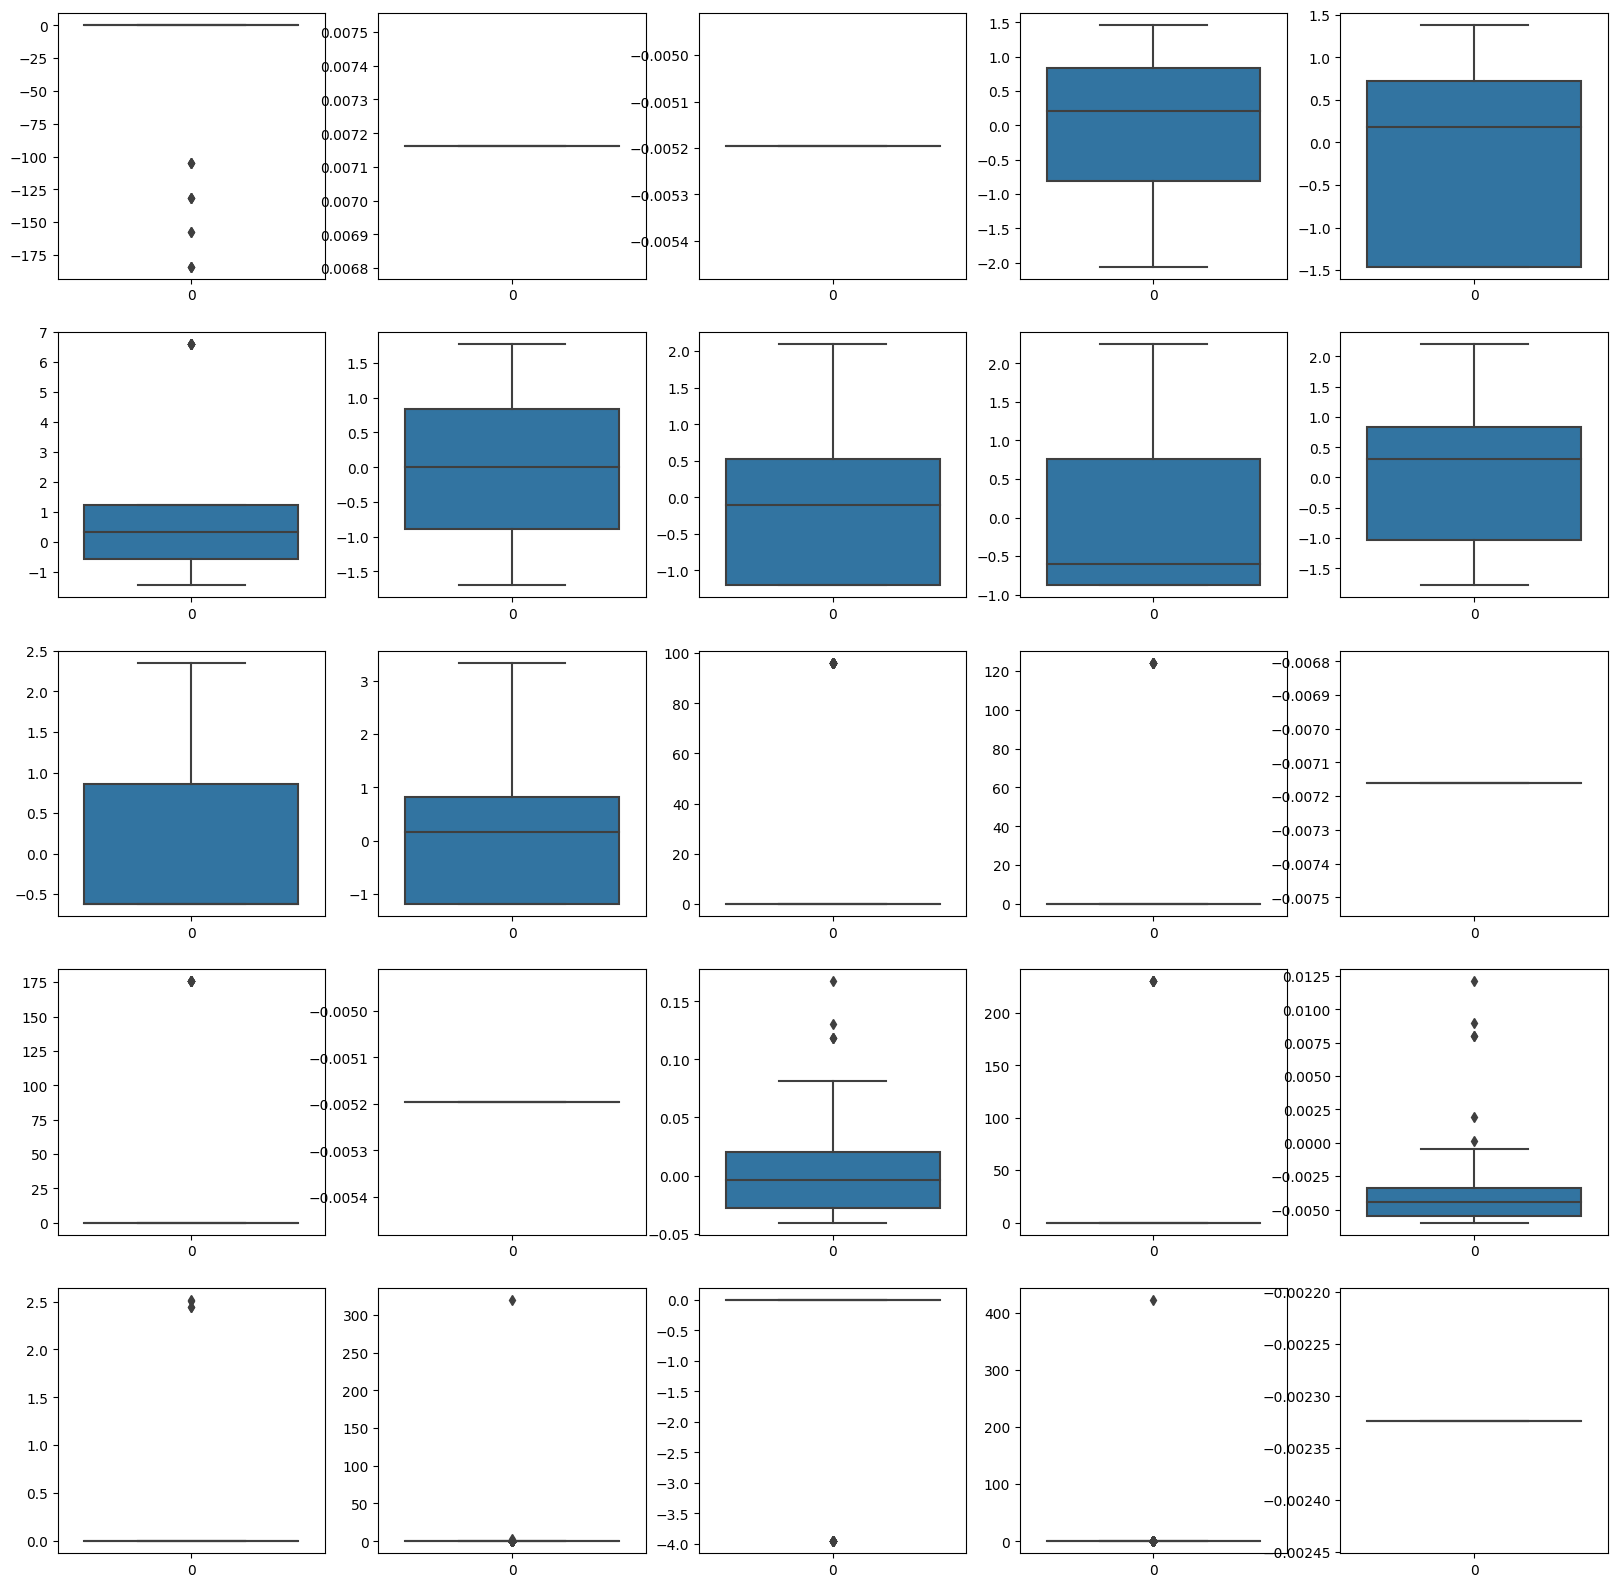

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,5,1)
sns.boxplot(major['daddr'])
plt.subplot(5,5,2)
sns.boxplot(major['category_DDoS'])
plt.subplot(5,5,3)
sns.boxplot(major['proto_tcp'])
plt.subplot(5,5,4)
sns.boxplot(major['seq'])
plt.subplot(5,5,5)
sns.boxplot(major['max'])
plt.subplot(5,5,6)
sns.boxplot(major['saddr'])
plt.subplot(5,5,7)
sns.boxplot(major['sport'])
plt.subplot(5,5,8)
sns.boxplot(major['mean'])
plt.subplot(5,5,9)
sns.boxplot(major['stddev'])
plt.subplot(5,5,10)
sns.boxplot(major['dur'])
plt.subplot(5,5,11)
sns.boxplot(major['min'])
plt.subplot(5,5,12)
sns.boxplot(major['sum'])
plt.subplot(5,5,13)
sns.boxplot(major['flgs_eU'])
plt.subplot(5,5,14)
sns.boxplot(major['state_CON'])
plt.subplot(5,5,15)
sns.boxplot(major['category_Normal'])
plt.subplot(5,5,16)
sns.boxplot(major['proto_arp'])
plt.subplot(5,5,17)
sns.boxplot(major['proto_tcp'])
plt.subplot(5,5,18)
sns.boxplot(major['spkts'])
plt.subplot(5,5,19)
sns.boxplot(major['proto_icmp'])
plt.subplot(5,5,20)
sns.boxplot(major['bytes'])
plt.subplot(5,5,21)
sns.boxplot(major['drate'])
plt.subplot(5,5,22)
sns.boxplot(major['rate'])
plt.subplot(5,5,23)
sns.boxplot(major['dport'])
plt.subplot(5,5,24)
sns.boxplot(major['srate'])
plt.subplot(5,5,25)
sns.boxplot(major['flgs_e *'])
plt.show()

In [ ]:
Q1 = major.quantile(0.25)
Q3 = major.quantile(0.75)
IQR = Q3 - Q1

new_major = major[~((major < (Q1 - 1.5 * IQR)) |(major > (Q3 + 1.5 * IQR))).any(axis=1)]

print(IQR)

saddr              1.788654
sport              1.718710
daddr              0.000000
dport              0.000000
bytes              0.002068
seq                1.652238
dur                1.867372
mean               1.723593
stddev             1.642631
sum                2.017729
min                1.479625
max                2.185597
spkts              0.048861
rate               0.008046
srate              0.010633
drate              0.000000
flgs_e *           0.000000
flgs_eU            0.000000
proto_arp          0.000000
proto_icmp         0.000000
proto_tcp          0.000000
proto_udp          0.000000
state_CON          0.000000
category_DDoS      0.000000
category_Normal    0.000000
dtype: float64


In [ ]:
new_major

,saddr,sport,daddr,dport,bytes,seq,dur,mean,stddev,sum,...,drate,flgs_e *,flgs_eU,proto_arp,proto_icmp,proto_tcp,proto_udp,state_CON,category_DDoS,category_Normal
0,-1.450116,-0.317407,0.007097,-0.002236,-0.004430,0.004383,-0.499519,0.578473,-0.514049,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
1,-1.450116,-0.317354,0.007097,-0.002236,-0.004430,0.004397,-0.499519,0.578473,-0.514049,0.286453,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
2,-1.450116,-0.317301,0.007097,-0.002236,-0.004430,0.004410,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
3,-1.450116,-0.317248,0.007097,-0.002236,-0.004430,0.004423,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
4,-1.450116,-0.317195,0.007097,-0.002236,-0.004430,0.004437,-0.499519,0.578473,-0.514050,0.286452,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370425,0.338537,1.341448,0.007097,-0.002236,-0.005464,1.455742,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
370426,0.338537,1.341501,0.007097,-0.002236,-0.005464,1.455756,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
370427,0.338537,1.341607,0.007097,-0.002236,-0.005464,1.455769,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162
370428,0.338537,1.341660,0.007097,-0.002236,-0.005464,1.455783,-1.000523,-1.203522,-0.878898,-1.192020,...,-0.003321,-0.002324,-0.010392,-0.005692,-0.004347,-0.005196,0.008848,-0.008049,0.007162,-0.007162


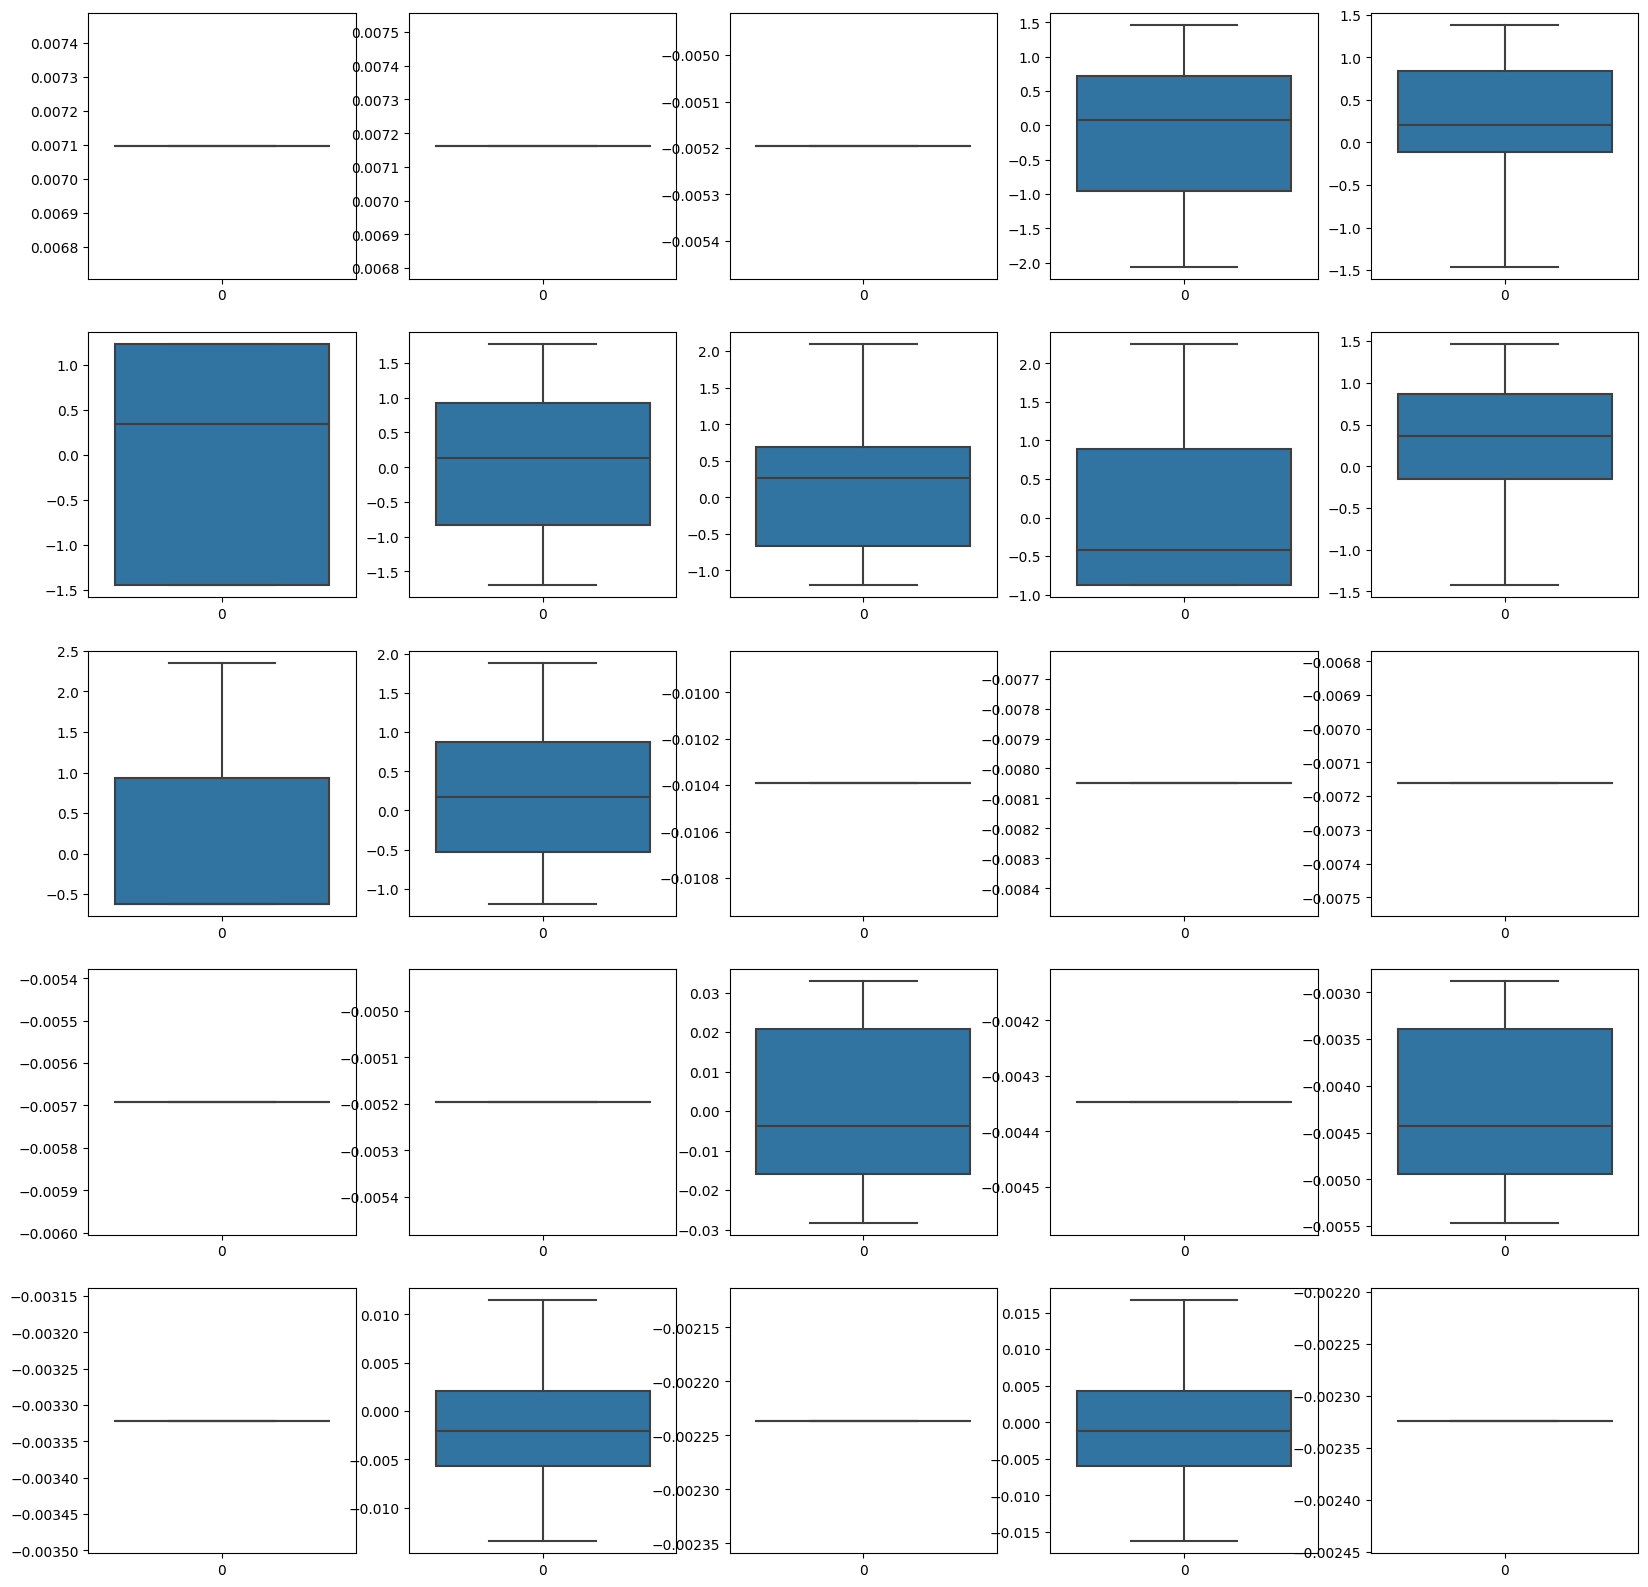

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,5,1)
sns.boxplot(new_major['daddr'])
plt.subplot(5,5,2)
sns.boxplot(new_major['category_DDoS'])
plt.subplot(5,5,3)
sns.boxplot(new_major['proto_tcp'])
plt.subplot(5,5,4)
sns.boxplot(new_major['seq'])
plt.subplot(5,5,5)
sns.boxplot(new_major['max'])
plt.subplot(5,5,6)
sns.boxplot(new_major['saddr'])
plt.subplot(5,5,7)
sns.boxplot(new_major['sport'])
plt.subplot(5,5,8)
sns.boxplot(new_major['mean'])
plt.subplot(5,5,9)
sns.boxplot(new_major['stddev'])
plt.subplot(5,5,10)
sns.boxplot(new_major['dur'])
plt.subplot(5,5,11)
sns.boxplot(new_major['min'])
plt.subplot(5,5,12)
sns.boxplot(new_major['sum'])
plt.subplot(5,5,13)
sns.boxplot(new_major['flgs_eU'])
plt.subplot(5,5,14)
sns.boxplot(new_major['state_CON'])
plt.subplot(5,5,15)
sns.boxplot(new_major['category_Normal'])
plt.subplot(5,5,16)
sns.boxplot(new_major['proto_arp'])
plt.subplot(5,5,17)
sns.boxplot(new_major['proto_tcp'])
plt.subplot(5,5,18)
sns.boxplot(new_major['spkts'])
plt.subplot(5,5,19)
sns.boxplot(new_major['proto_icmp'])
plt.subplot(5,5,20)
sns.boxplot(new_major['bytes'])
plt.subplot(5,5,21)
sns.boxplot(new_major['drate'])
plt.subplot(5,5,22)
sns.boxplot(new_major['rate'])
plt.subplot(5,5,23)
sns.boxplot(new_major['dport'])
plt.subplot(5,5,24)
sns.boxplot(new_major['srate'])
plt.subplot(5,5,25)
sns.boxplot(new_major['flgs_e *'])
plt.show()

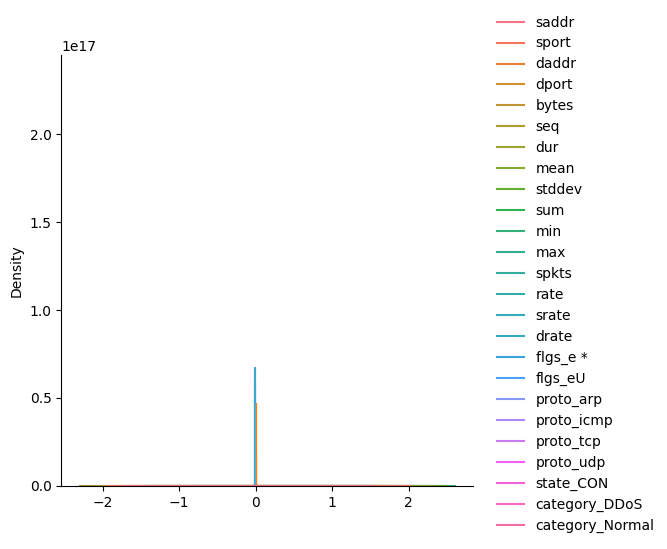

In [ ]:
sns.displot(new_major, kind="kde", bw_adjust=1)

# PCA

# Major - PCA

In [ ]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(new_major)
x=principal.transform(new_major)

In [ ]:
pca_major = pd.DataFrame(data = x)

In [ ]:
pca_major.head()

,0,1
0,-0.903898,0.621921
1,-0.903904,0.621926
2,-0.903909,0.621932
3,-0.903914,0.621937
4,-0.903919,0.621943


In [ ]:
pca_major.shape

(330598, 2)

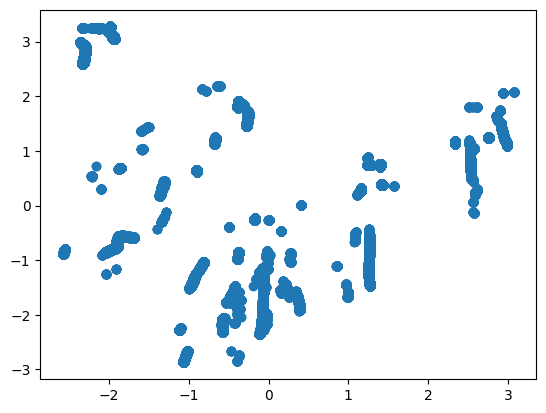

In [ ]:
plt.scatter(pca_major[0],pca_major[1])

# Minor - PCA

In [ ]:
minor = minor.drop('attack',axis=1)

In [ ]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(minor)
y=principal.transform(minor)

In [ ]:
pca_minor = pd.DataFrame(data = y)

In [ ]:
pca_minor.shape

(19, 2)

In [ ]:
pca_minor['attack'] = 0

In [ ]:
pca_minor

,0,1,attack
0,289.315936,-104.271852,0
1,526.258241,11.951873,0
2,35.692886,-78.986703,0
3,-61.357015,64.121858,0
4,64.173816,45.493056,0
5,-11.909799,51.978696,0
6,-86.580000,-48.146508,0
7,-177.715873,355.910655,0
8,-261.839793,-338.382946,0
9,-137.776416,-84.040651,0


## K-Means cluster centroid calculation - PCA

In [ ]:
# We do PCA to reduce the dimensionality in order for us to proceed with the clustering (2 columns without attack)
# We might add attack later if any errors

In [ ]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters = 100,init="k-means++",random_state=0).fit(pca_major)

In [ ]:
print(kmeans.cluster_centers_)

[[-0.06823257 -1.46535407]
 [-0.26317764  1.57161888]
 [ 2.96060213  1.21711896]
 [-2.33386632  2.95637526]
 [-1.34620217  0.27434984]
 [ 1.26198062 -0.97530832]
 [-2.01379326 -0.83936807]
 [ 1.42326796  0.38175463]
 [-1.05756421 -2.81949166]
 [-0.92074262 -1.2830765 ]
 [-0.10143597 -2.28578549]
 [ 2.5303172   0.9033305 ]
 [-0.38432915 -0.94387628]
 [-1.99426021  3.16548221]
 [ 0.38712312 -1.86038402]
 [-0.49269186 -1.72647687]
 [-1.8703766   0.68037686]
 [-0.57668779 -2.27317349]
 [ 2.54518977  0.50088831]
 [ 2.90061107  1.51756397]
 [ 1.26518757 -0.60410662]
 [-0.16127631 -0.2513322 ]
 [-0.6740488   1.18795661]
 [ 1.25653045 -1.27757595]
 [-2.56636423 -0.84346114]
 [-1.89927719 -0.68451645]
 [-0.37728531  1.86032275]
 [-0.05653557 -1.97981256]
 [-0.90391584  0.63541995]
 [-0.45719092 -1.61014607]
 [ 1.39135301  0.74428436]
 [ 2.54322536  1.03718688]
 [ 1.15342196  0.27387562]
 [-0.06773233 -1.32127127]
 [-2.29858348  2.85913037]
 [-0.07050095 -1.72676993]
 [-0.97678733 -1.47521512]
 

In [ ]:
cc_pca = kmeans.cluster_centers_

In [ ]:
cc_pca = pd.DataFrame(cc_pca)

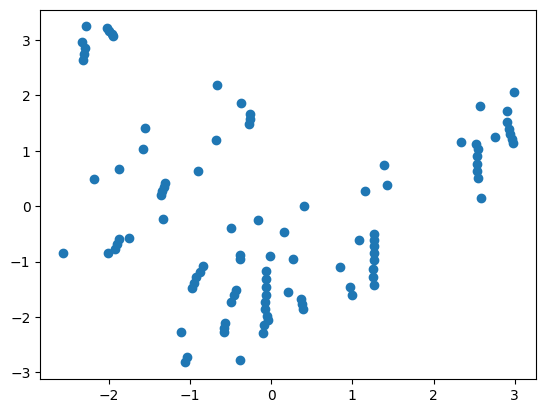

In [ ]:
print(plt.scatter(cc_pca[0],cc_pca[1]))

In [ ]:
cc_pca['attack'] = 1

In [ ]:
cc_pca

,0,1,attack
0,-0.068233,-1.465354,1
1,-0.263178,1.571619,1
2,2.960602,1.217119,1
3,-2.333866,2.956375,1
4,-1.346202,0.274350,1
...,...,...,...
95,-1.359525,0.204453,1
96,-1.584189,1.033568,1
97,0.971550,-1.452740,1
98,-0.583893,-2.192105,1


In [ ]:
frames = [cc_pca, pca_minor]

In [ ]:
train_data_pca = pd.concat(frames)

In [ ]:
train_data_pca

,0,1,attack
0,-0.068233,-1.465354,1
1,-0.263178,1.571619,1
2,2.960602,1.217119,1
3,-2.333866,2.956375,1
4,-1.346202,0.274350,1
...,...,...,...
14,-51.869769,-66.766465,0
15,-59.004639,57.205322,0
16,-113.577420,-46.346035,0
17,-82.931634,64.939261,0


# Test data - PCA

In [ ]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(ns_ds)
z=principal.transform(ns_ds)
test_data_pca = pd.DataFrame(data = z)

In [ ]:
test_data_pca.shape

(370443, 2)

# SPLITUP - PCA

In [ ]:
pcaX_train = train_data_pca[train_data_pca.columns[0:2]]
pcaX_test = test_data_pca
pcay_train = train_data_pca['attack']
pcay_test = new_ds['attack']

In [ ]:
pcaX_train

,0,1
0,-0.068233,-1.465354
1,-0.263178,1.571619
2,2.960602,1.217119
3,-2.333866,2.956375
4,-1.346202,0.274350
...,...,...
14,-51.869769,-66.766465
15,-59.004639,57.205322
16,-113.577420,-46.346035
17,-82.931634,64.939261


In [ ]:
pcay_train

0     1
1     1
2     1
3     1
4     1
     ..
14    0
15    0
16    0
17    0
18    0
Name: attack, Length: 119, dtype: int64

In [ ]:
pcaX_test

,0,1
0,0.025780,-0.533547
1,0.025780,-0.533552
2,0.025779,-0.533554
3,0.025779,-0.533558
4,0.025779,-0.533562
...,...,...
370438,180.621680,2.512346
370439,286.361873,32.899100
370440,144.539439,2.123875
370441,267.224257,31.709724


In [ ]:
pcay_test

0         1
1         1
2         1
3         1
4         1
         ..
370438    0
370439    0
370440    0
370441    0
370442    0
Name: attack, Length: 370443, dtype: int64

# SVD

# Major - SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(new_major)
a = svd.transform(new_major)
svd_major = pd.DataFrame(data = a)

In [ ]:
svd_major.head()

,0,1
0,-0.795165,0.955753
1,-0.795168,0.955761
2,-0.795170,0.955769
3,-0.795172,0.955776
4,-0.795174,0.955783


In [ ]:
svd_major.shape

(330598, 2)

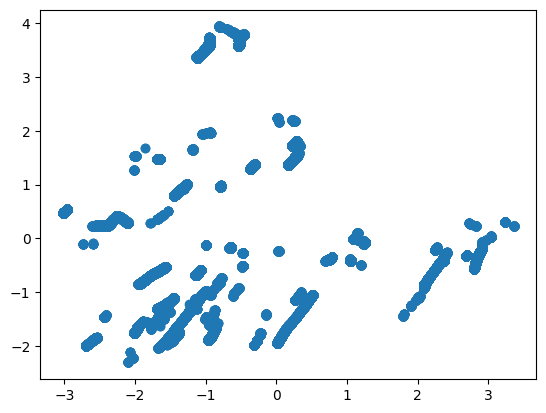

In [ ]:
plt.scatter(svd_major[0],svd_major[1])

# Minor - SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(minor)
b = svd.transform(minor)
svd_minor = pd.DataFrame(data = b)

In [ ]:
svd_minor.shape

(19, 2)

In [ ]:
svd_minor['attack'] = 0

In [ ]:
svd_minor

,0,1,attack
0,459.808187,-220.570889,0
1,657.417836,-322.361693,0
2,274.261863,-41.857356,0
3,287.941362,122.770747,0
4,396.601157,36.351348,0
5,331.639100,88.163440,0
6,181.143356,52.098947,0
7,290.889426,331.162763,0
8,169.077362,215.734047,0
9,176.614828,106.664763,0


## K-Means cluster centroid calculation -  SVD

In [ ]:
# We do PCA to reduce the dimensionality in order for us to proceed with the clustering (2 columns without attack)
# We might add attack later if any errors

In [ ]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters = 100,init="k-means++",random_state=0).fit(pca_major)

In [ ]:
print(kmeans.cluster_centers_)

[[-0.06823257 -1.46535407]
 [-0.26317764  1.57161888]
 [ 2.96060213  1.21711896]
 [-2.33386632  2.95637526]
 [-1.34620217  0.27434984]
 [ 1.26198062 -0.97530832]
 [-2.01379326 -0.83936807]
 [ 1.42326796  0.38175463]
 [-1.05756421 -2.81949166]
 [-0.92074262 -1.2830765 ]
 [-0.10143597 -2.28578549]
 [ 2.5303172   0.9033305 ]
 [-0.38432915 -0.94387628]
 [-1.99426021  3.16548221]
 [ 0.38712312 -1.86038402]
 [-0.49269186 -1.72647687]
 [-1.8703766   0.68037686]
 [-0.57668779 -2.27317349]
 [ 2.54518977  0.50088831]
 [ 2.90061107  1.51756397]
 [ 1.26518757 -0.60410662]
 [-0.16127631 -0.2513322 ]
 [-0.6740488   1.18795661]
 [ 1.25653045 -1.27757595]
 [-2.56636423 -0.84346114]
 [-1.89927719 -0.68451645]
 [-0.37728531  1.86032275]
 [-0.05653557 -1.97981256]
 [-0.90391584  0.63541995]
 [-0.45719092 -1.61014607]
 [ 1.39135301  0.74428436]
 [ 2.54322536  1.03718688]
 [ 1.15342196  0.27387562]
 [-0.06773233 -1.32127127]
 [-2.29858348  2.85913037]
 [-0.07050095 -1.72676993]
 [-0.97678733 -1.47521512]
 

In [ ]:
cc_svd = kmeans.cluster_centers_

In [ ]:
cc_svd = pd.DataFrame(cc_svd)

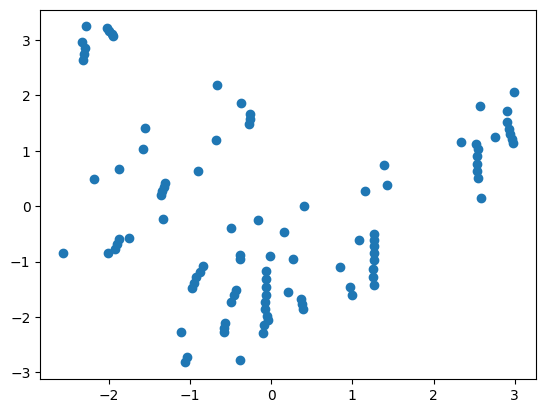

In [ ]:
print(plt.scatter(cc_svd[0],cc_svd[1]))

In [ ]:
cc_svd['attack'] = 1

In [ ]:
cc_svd

,0,1,attack
0,-0.068233,-1.465354,1
1,-0.263178,1.571619,1
2,2.960602,1.217119,1
3,-2.333866,2.956375,1
4,-1.346202,0.274350,1
...,...,...,...
95,-1.359525,0.204453,1
96,-1.584189,1.033568,1
97,0.971550,-1.452740,1
98,-0.583893,-2.192105,1


In [ ]:
frames = [cc_svd, svd_minor]

In [ ]:
train_data_svd = pd.concat(frames)

In [ ]:
train_data_svd

,0,1,attack
0,-0.068233,-1.465354,1
1,-0.263178,1.571619,1
2,2.960602,1.217119,1
3,-2.333866,2.956375,1
4,-1.346202,0.274350,1
...,...,...,...
14,190.293507,14.327978,0
15,283.544453,116.732071,0
16,148.605890,66.051705,0
17,262.642863,133.994138,0


# Test data -  SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(ns_ds)
d = svd.transform(ns_ds)
test_data_svd = pd.DataFrame(data = d)

In [ ]:
test_data_svd

,0,1
0,0.025780,-0.533549
1,0.025780,-0.533553
2,0.025779,-0.533556
3,0.025779,-0.533560
4,0.025779,-0.533563
...,...,...
370438,180.621674,2.512219
370439,286.361900,32.899571
370440,144.539425,2.123411
370441,267.224282,31.710095


# SPLITUP - SVD

In [ ]:
svdX_train = train_data_svd[train_data_svd.columns[0:2]]
svdX_test = test_data_svd
svdy_train = train_data_svd['attack']
svdy_test = new_ds['attack']

In [ ]:
svdX_train

,0,1
0,-0.068233,-1.465354
1,-0.263178,1.571619
2,2.960602,1.217119
3,-2.333866,2.956375
4,-1.346202,0.274350
...,...,...
14,190.293507,14.327978
15,283.544453,116.732071
16,148.605890,66.051705
17,262.642863,133.994138


In [ ]:
svdy_train

0     1
1     1
2     1
3     1
4     1
     ..
14    0
15    0
16    0
17    0
18    0
Name: attack, Length: 119, dtype: int64

In [ ]:
svdX_test

,0,1
0,0.025780,-0.533549
1,0.025780,-0.533553
2,0.025779,-0.533556
3,0.025779,-0.533560
4,0.025779,-0.533563
...,...,...
370438,180.621674,2.512219
370439,286.361900,32.899571
370440,144.539425,2.123411
370441,267.224282,31.710095


In [ ]:
svdy_test

0         1
1         1
2         1
3         1
4         1
         ..
370438    0
370439    0
370440    0
370441    0
370442    0
Name: attack, Length: 370443, dtype: int64

# MODELS

# KNN

**WITH PCA**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# error_rate = []
# for i in range(1,119):
#  knn = KNeighborsClassifier(n_neighbors=i)
#  knn.fit(pcaX_train,pcay_train)
#  pred_i = knn.predict(pcaX_test)
#  error_rate.append(np.mean(pred_i != pcay_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,119),error_rate,color='blue', linestyle='dashed',
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
# k= 3,4,5,6
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(pcaX_train,pcay_train)
y_pred1= knn.predict(pcaX_test)
metrics.accuracy_score(pcay_test,y_pred1)

0.9999973005293662

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(pcay_test, y_pred1)
confusion_matrix1

array([[    18,      1],
       [     0, 370424]])

In [ ]:
print(classification_report(pcay_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00    370424

    accuracy                           1.00    370443
   macro avg       1.00      0.97      0.99    370443
weighted avg       1.00      1.00      1.00    370443



**WITH SVD**

In [ ]:
# error_rate = []
# for i in range(1,119):
#  knn = KNeighborsClassifier(n_neighbors=i)
#  knn.fit(svdX_train,svdy_train)
#  pred_i = knn.predict(svdX_test)
#  error_rate.append(np.mean(pred_i != svdy_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,119),error_rate,color='blue', linestyle='dashed',
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
# k= 9,10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(svdX_train,svdy_train)
y_pred2= knn.predict(svdX_test)
metrics.accuracy_score(svdy_test,y_pred2)

0.9999973005293662

In [ ]:
confusion_matrix2 = confusion_matrix(svdy_test, y_pred2)
confusion_matrix2

array([[    19,      0],
       [     1, 370423]])

In [ ]:
print(classification_report(svdy_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00    370424

    accuracy                           1.00    370443
   macro avg       0.97      1.00      0.99    370443
weighted avg       1.00      1.00      1.00    370443




# SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xs, ys = oversample.fit_resample(pcaX_train, pcay_train)

In [ ]:
xs

,0,1
0,-0.068233,-1.465354
1,-0.263178,1.571619
2,2.960602,1.217119
3,-2.333866,2.956375
4,-1.346202,0.274350
...,...,...
195,-78.367830,64.106426
196,-101.985595,-50.182027
197,-84.499271,-49.262694
198,-100.510177,-129.687524


In [ ]:
ys

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: attack, Length: 200, dtype: int64

# KNN WITH SMOTE


In [ ]:
# error_rate = []
# for i in range(1,119):
#  knn = KNeighborsClassifier(n_neighbors=i)
#  knn.fit(xs,ys)
#  pred_i = knn.predict(pcaX_test)
#  error_rate.append(np.mean(pred_i != pcay_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,119),error_rate,color='blue', linestyle='dashed',
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
# k= 25
knn= KNeighborsClassifier(n_neighbors=39)
knn.fit(xs,ys)
y_pred3= knn.predict(pcaX_test)
metrics.accuracy_score(pcay_test,y_pred3)

0.999986502646831

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(pcay_test, y_pred3)
confusion_matrix3

array([[    14,      5],
       [     0, 370424]])

In [ ]:
print(classification_report(pcay_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       1.00      1.00      1.00    370424

    accuracy                           1.00    370443
   macro avg       1.00      0.87      0.92    370443
weighted avg       1.00      1.00      1.00    370443



# SVM

WITH PCA

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(pcaX_train, pcay_train)
y_pred4 = clf.predict(pcaX_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(pcay_test, y_pred4))


Accuracy: 0.9999541089992252


In [ ]:
confusion_matrix4 = confusion_matrix(pcay_test, y_pred4)
confusion_matrix4

array([[    19,      0],
       [    17, 370407]])

In [ ]:
print(classification_report(pcay_test, y_pred4))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        19
           1       1.00      1.00      1.00    370424

    accuracy                           1.00    370443
   macro avg       0.76      1.00      0.85    370443
weighted avg       1.00      1.00      1.00    370443



WITH SVD

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(svdX_train, svdy_train)
y_pred5 = clf.predict(svdX_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svdy_test, y_pred5))


Accuracy: 0.9999919015880986


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix5 = confusion_matrix(svdy_test, y_pred5)
confusion_matrix5

array([[    19,      0],
       [     3, 370421]])

In [ ]:
print(classification_report(svdy_test, y_pred5))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      1.00      1.00    370424

    accuracy                           1.00    370443
   macro avg       0.93      1.00      0.96    370443
weighted avg       1.00      1.00      1.00    370443



WITH SMOTE

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(xs, ys)
y_pred6 = clf.predict(pcaX_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(pcay_test, y_pred6))


Accuracy: 0.9999514095285914


In [ ]:
confusion_matrix4 = confusion_matrix(pcay_test, y_pred6)
confusion_matrix4

array([[    19,      0],
       [    18, 370406]])

In [ ]:
print(classification_report(pcay_test, y_pred6))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        19
           1       1.00      1.00      1.00    370424

    accuracy                           1.00    370443
   macro avg       0.76      1.00      0.84    370443
weighted avg       1.00      1.00      1.00    370443



# RANDOM FOREST

WITH PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pcaX_train,pcay_train)

Pred1 = clf.predict(pcaX_test)
print(Pred1)

[1 1 1 ... 1 0 0]


In [ ]:
rand_score1 = clf.score(pcaX_test, pcay_test)

classification_report_rf = classification_report(pcay_test,Pred1)
print("Accuracy score:",rand_score1)

Accuracy score: 0.9999487100579576


In [ ]:
confusion_matrix5 = confusion_matrix(pcay_test,Pred1)
confusion_matrix5

array([[    18,      1],
       [    18, 370406]])

WITH SVD

In [ ]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(svdX_train,svdy_train)

Pred2 = clf.predict(svdX_test)
print(Pred2)

[1 1 1 ... 0 0 0]


In [ ]:
rand_score2 = clf.score(svdX_test, svdy_test)

classification_report_rf = classification_report(svdy_test,Pred2)
print("Accuracy score:",rand_score2)

Accuracy score: 0.9999541089992252


In [ ]:
confusion_matrix6 = confusion_matrix(svdy_test,Pred2)
confusion_matrix6

array([[    19,      0],
       [    17, 370407]])

WITH SMOTE

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xs,ys)

Pred3 = clf.predict(pcaX_test)
print(Pred3)

[1 1 1 ... 0 0 0]


In [ ]:
rand_score3 = clf.score(pcaX_test, pcay_test)

classification_report_rf = classification_report(pcay_test,Pred3)
print("Accuracy score:",rand_score3)

Accuracy score: 0.9999514095285914


In [ ]:
confusion_matrix7 = confusion_matrix(pcay_test,Pred3)
confusion_matrix7

array([[    19,      0],
       [    18, 370406]])

# **DECISION TREE**

WITH PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(pcaX_train,pcay_train)

#Predict the response for test dataset
y_pred10 = clf2.predict(pcaX_test)

print("Accuracy: ",metrics.accuracy_score(pcay_test, y_pred10))

Accuracy:  0.9999514095285914


In [ ]:
confusion_matrix8 = confusion_matrix(pcay_test, y_pred10)
confusion_matrix8

array([[    19,      0],
       [    18, 370406]])

WITH SVD

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(svdX_train,svdy_train)

#Predict the response for test dataset
y_pred11 = clf2.predict(svdX_test)

print("Accuracy: ",metrics.accuracy_score(svdy_test, y_pred11))

Accuracy:  0.9999622074111266


In [ ]:
confusion_matrix9 = confusion_matrix(svdy_test, y_pred11)
confusion_matrix9

array([[    19,      0],
       [    14, 370410]])

WITH SMOTE

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(xs,ys)

#Predict the response for test dataset
y_pred12 = clf2.predict(pcaX_test)

print("Accuracy: ",metrics.accuracy_score(pcay_test, y_pred12))

Accuracy:  0.9999514095285914


In [ ]:
confusion_matrix10 = confusion_matrix(pcay_test, y_pred12)
confusion_matrix10

array([[    19,      0],
       [    18, 370406]])

# **DEEP LEARNING**

# ANN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(pcaX_train,pcay_train,batch_size=32,epochs = 30)

Epoch 1/30
4/4 [==============================] - 6s 7ms/step - loss: 2.0365 - accuracy: 0.4538
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 1.9148 - accuracy: 0.4538
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 1.8030 - accuracy: 0.4538
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 1.7052 - accuracy: 0.4538
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 1.6059 - accuracy: 0.4622
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 1.5038 - accuracy: 0.4538
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 1.3823 - accuracy: 0.4622
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 1.3145 - accuracy: 0.4622
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 1.2230 - accuracy: 0.4706
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 1.1663 - accuracy: 0.4790
Epoch 11/30
4/4 [======================

In [ ]:
tres = ann.predict(pcaX_test)

11577/11577 [==============================] - 20s 2ms/step


In [ ]:
y_pred7 = [1 if x>=0.5 else 0 for x in tres]

In [ ]:
print("Accuracy:",metrics.accuracy_score(pcay_test, y_pred7))

Accuracy: 0.9999514095285914


In [ ]:
confusion_matrix11 = confusion_matrix(pcay_test, y_pred7)
confusion_matrix11

array([[    19,      0],
       [    18, 370406]])

## ANN WITH SVD

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(svdX_train,svdy_train,batch_size=32,epochs = 30)

Epoch 1/30
4/4 [==============================] - 1s 6ms/step - loss: 0.7297 - accuracy: 0.2689
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.7136 - accuracy: 0.2689
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.2773
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.2857
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.6682 - accuracy: 0.3025
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.3361
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.3782
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 0.6274 - accuracy: 0.4706
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6152 - accuracy: 0.5126
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.5126
Epoch 11/30
4/4 [======================

In [ ]:
tres = ann.predict(svdX_test)

11577/11577 [==============================] - 20s 2ms/step


In [ ]:
y_pred8 = [1 if x>=0.5 else 0 for x in tres]

In [ ]:
print("Accuracy:",metrics.accuracy_score(svdy_test, y_pred8))

Accuracy: 0.9999514095285914


In [ ]:
confusion_matrix12 = confusion_matrix(pcay_test, y_pred8)
confusion_matrix12

array([[    19,      0],
       [    18, 370406]])

## ANN WITH SMOTE

In [ ]:
ann1 = tf.keras.models.Sequential()

In [ ]:
ann1.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann1.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann1.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann1.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann1.fit(xs,ys,batch_size=32,epochs = 30)

Epoch 1/30
7/7 [==============================] - 1s 5ms/step - loss: 23.2646 - accuracy: 0.4650
Epoch 2/30
7/7 [==============================] - 0s 4ms/step - loss: 21.2711 - accuracy: 0.4250
Epoch 3/30
7/7 [==============================] - 0s 4ms/step - loss: 19.2328 - accuracy: 0.4350
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 17.6467 - accuracy: 0.4500
Epoch 5/30
7/7 [==============================] - 0s 4ms/step - loss: 15.9373 - accuracy: 0.4600
Epoch 6/30
7/7 [==============================] - 0s 5ms/step - loss: 14.4595 - accuracy: 0.4400
Epoch 7/30
7/7 [==============================] - 0s 4ms/step - loss: 12.9856 - accuracy: 0.4550
Epoch 8/30
7/7 [==============================] - 0s 6ms/step - loss: 11.7460 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 4ms/step - loss: 10.7318 - accuracy: 0.4350
Epoch 10/30
7/7 [==============================] - 0s 4ms/step - loss: 9.6089 - accuracy: 0.4200
Epoch 11/30
7/7 [=============

In [ ]:
tres1 = ann1.predict(pcaX_test)

11577/11577 [==============================] - 20s 2ms/step


In [ ]:
y_pred9 = [1 if x>=0.5 else 0 for x in tres1]

In [ ]:
print("Accuracy:",metrics.accuracy_score(pcay_test, y_pred9))

Accuracy: 0.033311467621199485


In [ ]:
confusion_matrix13 = confusion_matrix(pcay_test, y_pred9)
confusion_matrix13

array([[     0,     19],
       [358084,  12340]])

# **LSTM**

WITH PCA

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Embedding

#model
model = Sequential()
model.add(Embedding(6000, 32, input_length=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(pcaX_train, pcay_train, epochs=10, batch_size=15)

# Final evaluation of the model
scores = model.evaluate(pcaX_test, pcay_test, verbose=0)
print("Accuracy: %.6f%%" % (scores[1]*100))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 32)             192000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 [==============================] - 6s 242ms/step - loss: 0.6809 - accuracy: 0.8067
Epoch 2/10
8/8 [==============================] - 0s 57ms/step - loss: 0.6519 - accuracy: 0.8403
Epoch 3/10
8/8 [==============================] - 1s 97ms/step - loss: 0.6066 - accuracy: 0.8403
Epoch 4/10
8/8 

WITH SVD

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Embedding

#model
model = Sequential()
model.add(Embedding(6000, 32, input_length=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(svdX_train, svdy_train, epochs=10, batch_size=15)

# Final evaluation of the model
scores = model.evaluate(svdX_test, svdy_test, verbose=0)
print("Accuracy: %.6f%%" % (scores[1]*100))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 32)             192000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 [==============================] - 3s 114ms/step - loss: 0.6808 - accuracy: 0.8235
Epoch 2/10
8/8 [==============================] - 0s 28ms/step - loss: 0.6488 - accuracy: 0.8403
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6004 - accuracy: 0.8403
Epoch 4/10
8/8 [

WITH SMOTE

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Embedding

#model
model1 = Sequential()
model1.add(Embedding(6000, 32, input_length=2))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model1.fit(xs, ys, epochs=10, batch_size=15)

# Final evaluation of the model
scores = model1.evaluate(pcaX_test, pcay_test, verbose=0)
print("Accuracy: %.6f%%" % (scores[1]*100))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 32)             192000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
14/14 [==============================] - 4s 156ms/step - loss: 0.6907 - accuracy: 0.6350
Epoch 2/10
14/14 [==============================] - 1s 46ms/step - loss: 0.6741 - accuracy: 0.8400
Epoch 3/10
14/14 [==============================] - 0s 26ms/step - loss: 0.6267 - accuracy: 0.9800
Epoch 4/1